# Monte Carlo Simulator Scenarios

### Leah Hogenmiller (lmh2ur)

In [1]:
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Scenario 1: A 2-headed coin

Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
Play a game of 1000 flips of three coins with all fair dice.
Play a game of 1000 flips with two unfair dice and one fair die.
For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
Compute relative frequency as the number of jackpots over the total number of rolls.
Show your results, comparing the two relative frequencies, in a simple bar chart.

In [2]:
fair_coin = Die(['H', 'T'])

unfair_coin = Die(['H', 'T'])
unfair_coin.change_weights('H', 5)

### 3 Fair Coins

In [15]:
game_3coins = Game([fair_coin, fair_coin, fair_coin])
game_3coins.play(rolls = 1000)

analyze_3coins = Analyzer(game_3coins)
relfrq_3coins = analyze_3coins.jackpot()/1000

### 2 Fair Coins and 1 Unfair Coin

In [16]:
game_3mix = Game([fair_coin, fair_coin, unfair_coin])
game_3mix.play(rolls=1000)

analyze_3mix = Analyzer(game_3mix)
relfrq_3mix = analyze_3mix.jackpot()/1000

### Relative Frequency of Jackpots

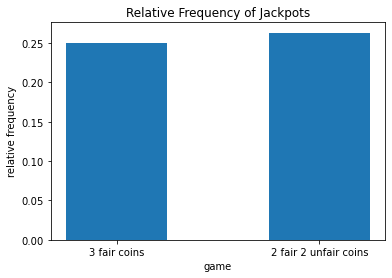

In [25]:
fig, ax  = plt.subplots()
ax.bar([1, 2], [relfrq_3coins, relfrq_3mix], width=0.5,
       tick_label=['3 fair coins', '2 fair 2 unfair coins'])
plt.xlabel('game')
plt.ylabel('relative frequency')
plt.title('Relative Frequency of Jackpots')

plt.show()

## Scenario 2: A 6-sided die

Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.
Play a game of 10000 rolls with 5 fair dice.
Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [6]:
faces = [1, 2, 3, 4, 5, 6]

fair_die = Die(faces)

unfair_die1 = Die(faces)
unfair_die1.change_weights(6, 5)

unfair_die2 = Die(faces)
unfair_die2.change_weights(1, 5)

### 5 Fair Dice

In [7]:
game_5fair = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
game_5fair.play(rolls=10000)

analyze_5fair = Analyzer(game_5fair)
relfrq_5fair = analyze_5fair.jackpot()/10000

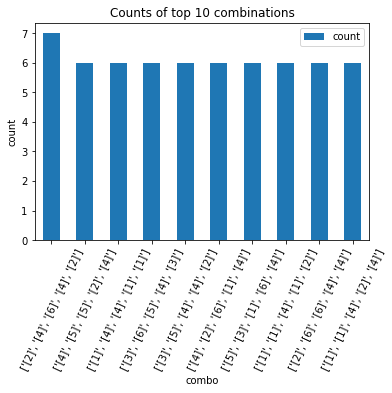

In [8]:
combos_5fair = analyze_5fair.combo()[:10]

combo_labels = combos_5fair.loc[:, combos_5fair.columns != 'count'].values.tolist()

ax = combos_5fair.plot.bar(xlabel='combo',ylabel='count',title='Counts of top 10 combinations')
ax.set_xticklabels(combo_labels, rotation=65)
plt.show()

### 2 Unfair Dice (Type 1), 1 Unfair Die (Type 2) and 2 Fair Dice 

In [9]:
game_5mix = Game([unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die])
game_5mix.play(rolls=10000)

analyze_5mix = Analyzer(game_5mix)
relfrq_5mix = analyze_5mix.jackpot()/10000

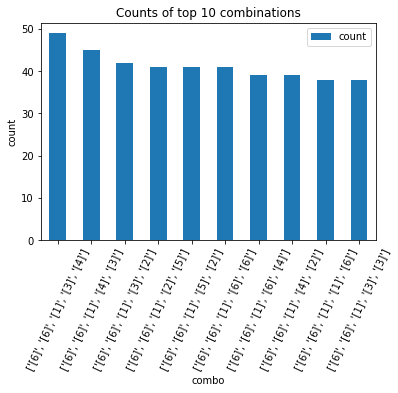

In [10]:
combos_5mix = analyze_5mix.combo()[:10]

combo_labels2 = combos_5mix.loc[:, combos_5mix.columns != 'count'].values.tolist()

ax = combos_5mix.plot.bar(xlabel='combo',ylabel='count',title='Counts of top 10 combinations')
ax.set_xticklabels(combo_labels2, rotation=65)
plt.show()

### Relative Frequency of Jackpots

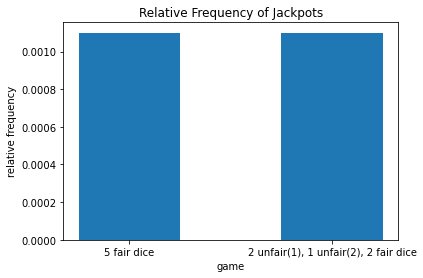

In [24]:
fig, ax  = plt.subplots()
ax.bar([1, 2], [relfrq_5fair, relfrq_5mix], width=0.5,
       tick_label=['5 fair dice', '2 unfair(1), 1 unfair(2), 2 fair dice'])
plt.xlabel('game')
plt.ylabel('relative frequency')
plt.title('Relative Frequency of Jackpots')

plt.show()

## Scenario 3: Letters of the Roman Alphabet 

Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.
Play a game involving 5 of these dice with 1000 rolls.
How many combos can you see that look like actual English words?
Based on your eye count, what is the relative frequency of these words versus the rest?


In [12]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', \
           'H', 'I', 'J', 'K', 'L', 'M', 'N', \
           'O', 'P', 'Q', 'R', 'S', 'T', 'U', \
           'V', 'W', 'X', 'Y', 'Z']

frequencies = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, \
              3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, \
              7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308, \
              1.0074, 1.2899, 0.2902, 1.779, 0.2722]

letters_die = Die(letters)

for (i, j) in zip(letters, frequencies):
    letters_die.change_weights(i, j)

In [13]:
game_5letters = Game([letters_die, letters_die, letters_die, letters_die, letters_die])
game_5letters.play(rolls=1000)

analyze_5letters = Analyzer(game_5letters)

In [18]:
analyze_5letters.combo()

,1,2,3,4,5,count
0,['A'],['A'],['F'],['S'],['F'],1
1,['O'],['O'],['I'],['S'],['O'],1
2,['O'],['I'],['U'],['E'],['A'],1
3,['O'],['L'],['G'],['G'],['C'],1
4,['O'],['L'],['H'],['B'],['T'],1
...,...,...,...,...,...,...
995,['G'],['O'],['T'],['Z'],['L'],1
996,['G'],['O'],['V'],['D'],['A'],1
997,['G'],['R'],['A'],['I'],['D'],1
998,['G'],['R'],['D'],['E'],['L'],1
